In [101]:
# Import and rename CSV files.
import pandas as pd 
df_shooting = pd.read_csv("combined_matches_shooting.csv")
df_poss = pd.read_csv("combined_matches_poss.csv")
df_creation = pd.read_csv("combined_matches_gca.csv")
df_assists = pd.read_csv("combined_matches_assists.csv")
df_defending = pd.read_csv("defensive.csv")


In [102]:
# Combine the dataframes into one dataframe 
combined_df = pd.concat([df_shooting, df_poss, df_assists, df_creation,df_defending], axis=1)

In [103]:
#Display the dataframe
combined_df

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Tkl_y.1,TklW_y,Def 3rd_y,Tkl%_y,Blocks_y,Sh_y,Int_y,Err_y,Season,Team
0,13/08/2023,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,Chelsea,...,8.0,10.0,13.0,66.7,10.0,5.0,8.0,0.0,2022,Arsenal
1,19/08/2023,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,Bournemouth,...,6.0,10.0,7.0,50.0,7.0,4.0,5.0,0.0,2022,Arsenal
2,27/08/2023,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,Newcastle Utd,...,10.0,10.0,12.0,40.0,12.0,4.0,6.0,0.0,2022,Arsenal
3,03/09/2023,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,Aston Villa,...,10.0,6.0,8.0,45.5,21.0,8.0,8.0,0.0,2022,Arsenal
4,16/09/2023,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,Wolves,...,7.0,13.0,13.0,41.2,13.0,6.0,10.0,0.0,2022,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,11.0,8.0,38.9,11.0,1.0,4.0,0.0,2017,Huddersfield Town
4428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,11.0,4.0,41.7,14.0,5.0,7.0,1.0,2017,Huddersfield Town
4429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,12.0,8.0,66.7,11.0,2.0,11.0,0.0,2017,Huddersfield Town
4430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,14.0,7.0,64.3,10.0,2.0,8.0,2.0,2017,Huddersfield Town


In [104]:
# Removing any duplicated and unnecessary columns 
cleaned_df = combined_df.drop(columns=['Unnamed: 0','PassLive_x.1','PassLive_y','PassLive_y.1','TO_y','TO_y.1', 'TO_x.1','Notes','Match Report'])

In [105]:
# Calculating total missing values in each column
nan_counts = cleaned_df.isna().sum()
# Displaying the NaN counts
nan_counts

Date      46
Time      46
Comp      46
Round     46
Day       46
          ..
Sh_y       0
Int_y      0
Err_y      0
Season     0
Team       0
Length: 140, dtype: int64

We can see that >95% of NAN values are attendance and these values were affecting games during the COVID-19 pandemic. 


In [108]:
# Removing rows containing missing values
e = cleaned_df.dropna()
cleaned_df = e

In [109]:
# Calculating total missing values in each column
nan_counts = cleaned_df.isna().sum()
# Displaying the NaN counts
nan_counts

Date      0
Time      0
Comp      0
Round     0
Day       0
         ..
Sh_y      0
Int_y     0
Err_y     0
Season    0
Team      0
Length: 140, dtype: int64

In [110]:
# Convert column names into lowercase for easier coding
cleaned_df.columns = cleaned_df.columns.str.lower()
# Remove rows from the end containing missing values due to scrapping
combined_df = cleaned_df.iloc[:4092]

Every df has a number of the same columns e.g. date and captain. We need to find these duplicated columns and remove them from our dataset leading to a cleaner table that is easily interperatable





In [111]:
# Create a variable returning True if column is previously in Df
duplicate_columns_mask = combined_df.columns.duplicated()
# Add dupe columns(returned as true in previous step) to list
duplicate_columns = combined_df.columns[duplicate_columns_mask].tolist()
# Display the dupe columns
if duplicate_columns:
    print("Duplicate columns found:")
    for col in duplicate_columns:
        print(col)
else:
    print("No duplicate columns found")

Duplicate columns found:
date
time
comp
round
day
venue
result
gf
ga
opponent
xg
xga
attendance
captain
formation
referee
poss
season
team
date
time
comp
round
day
venue
result
gf
ga
opponent
xg
xga
poss
attendance
captain
formation
referee
season
team
date
time
comp
round
day
venue
result
gf
ga
opponent
xg
xga
poss
attendance
captain
formation
referee
season
team
date
time
comp
round
day
venue
result
gf
ga
opponent
xg
xga
poss
attendance
captain
formation
referee
sh_x
sh_y
season
team


In [112]:
# Remove dupe columns
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]

In [113]:
# Create a variable returning True if column is previously in Df
duplicate_columns_mask = combined_df.columns.duplicated()
# Add dupe columns(returned as true in previous step) to list
duplicate_columns = combined_df.columns[duplicate_columns_mask].tolist()
# Display the dupe columns
if duplicate_columns:
    print("Duplicate columns found:")
    for col in duplicate_columns:
        print(col)
else:
    print("No duplicate columns found")

No duplicate columns found


We can then use 'dtype' to display our column names and the ones that may need renaming or transforming. In machine learning, predictors must be numerical values e.g. float or int

In [114]:
# Analyse data type of each column
combined_df.dtypes

date          object
time          object
comp          object
round         object
day           object
              ...   
def 3rd_y    float64
tkl%_y       float64
blocks_y     float64
int_y        float64
err_y        float64
Length: 62, dtype: object

We can see in the table above that a few important columns are of type 'object'. Therefore, in order to use these as predictors, we can convert them into cetegorical values that can be given a numerical code. This allows us to convert strings which can contain names of people or places, convert them into into a numerical value by giving each potenital predictor of type 'object' a unique identfier. We can use as.type and .to to change the types of these columns. Furthermore, "cat.codes" enables us to set the unique numerical identfier for each unique value in our columns.

In [115]:
# The idea of coverting strings to numerical data in the fashion below has been inspired by DataQuest.
# Convert non-numerical columns into continuous values
combined_df["date"] = pd.to_datetime(combined_df["date"])
combined_df["venue_code"] = combined_df["venue"].astype("category").cat.codes
combined_df["opp_code"] = combined_df["opponent"].astype("category").cat.codes
combined_df["hour"] = combined_df["time"].str.replace(":.+", "", regex=True).astype("int")
combined_df["day_code"] = combined_df["date"].dt.dayofweek 
combined_df["referee_code"] = combined_df["referee"].astype("category").cat.codes
combined_df["formation_code"] = combined_df["formation"].astype("category").cat.codes
combined_df["captain_code"] = combined_df["captain"].astype("category").cat.codes


In [117]:
# Checking how many obs exist for each club
team_value_counts = combined_df['team'].value_counts()
team_value_counts

Crystal Palace              127
Manchester United           126
Arsenal                     125
Chelsea                     125
Tottenham Hotspur           124
Everton                     116
Manchester City             113
Aston Villa                 112
Liverpool                   101
Newcastle United             98
Wolverhampton Wanderers      98
Brentford                    96
West Ham United              93
Brighton and Hove Albion     87
Watford                      86
Burnley                      78
Fulham                       67
Leicester City               63
Bournemouth                  53
Southampton                  51
Norwich City                 48
Sheffield United             47
Nottingham Forest            34
Leeds United                 34
Luton Town                   30
Name: team, dtype: int64

We can see that there is a big differential in the amount of games for different teams. This is due teams being promoted and demoted during the duration of our data.

The amount of observations for teams that have not been relegated also differ due to the removal of missing values and some teams playing more games then others at the time of the scraping.


In [55]:
# Filtering for games between 2018-2019 to 2023-2024
epl1_df = combined_df[combined_df['date'] < '2023-08-01']
epl_df = epl1_df[epl1_df['date'] > '2018-08-01' ]

In [56]:
team_value_counts = epl_df['team'].value_counts()
team_value_counts

Manchester United           190
Chelsea                     190
Crystal Palace              190
Arsenal                     190
Leicester City              190
West Ham United             190
Wolverhampton Wanderers     190
Tottenham Hotspur           190
Liverpool                   190
Everton                     190
Manchester City             190
Newcastle United            162
Aston Villa                 152
Southampton                 152
Brighton and Hove Albion    152
Watford                     114
Leeds United                114
Burnley                     114
Brentford                    76
Sheffield United             76
Bournemouth                  76
Fulham                       76
Norwich City                 76
West Bromwich Albion         38
Nottingham Forest            38
Name: team, dtype: int64

Next, a program is created to conduct a test to determine the balance of the classes. Imbalanced classes can cause issues and it is paramount to check for this before modelling

In [118]:
# checking the numbers for each class for multi-class target variable
result_count = epl_df["result"].value_counts()
result_count

W    1405
L    1315
D     786
Name: result, dtype: int64

In [119]:
nan_counts = epl_df.isna().sum()
# Displaying the NaN counts
nan_counts

date              0
time              0
comp              0
round             0
day               0
                 ..
hour              0
day_code          0
referee_code      0
formation_code    0
captain_code      0
Length: 69, dtype: int64

In [120]:
epl_df.dtypes

date              datetime64[ns]
time                      object
comp                      object
round                     object
day                       object
                       ...      
hour                       int64
day_code                   int64
referee_code                int8
formation_code              int8
captain_code               int16
Length: 69, dtype: object

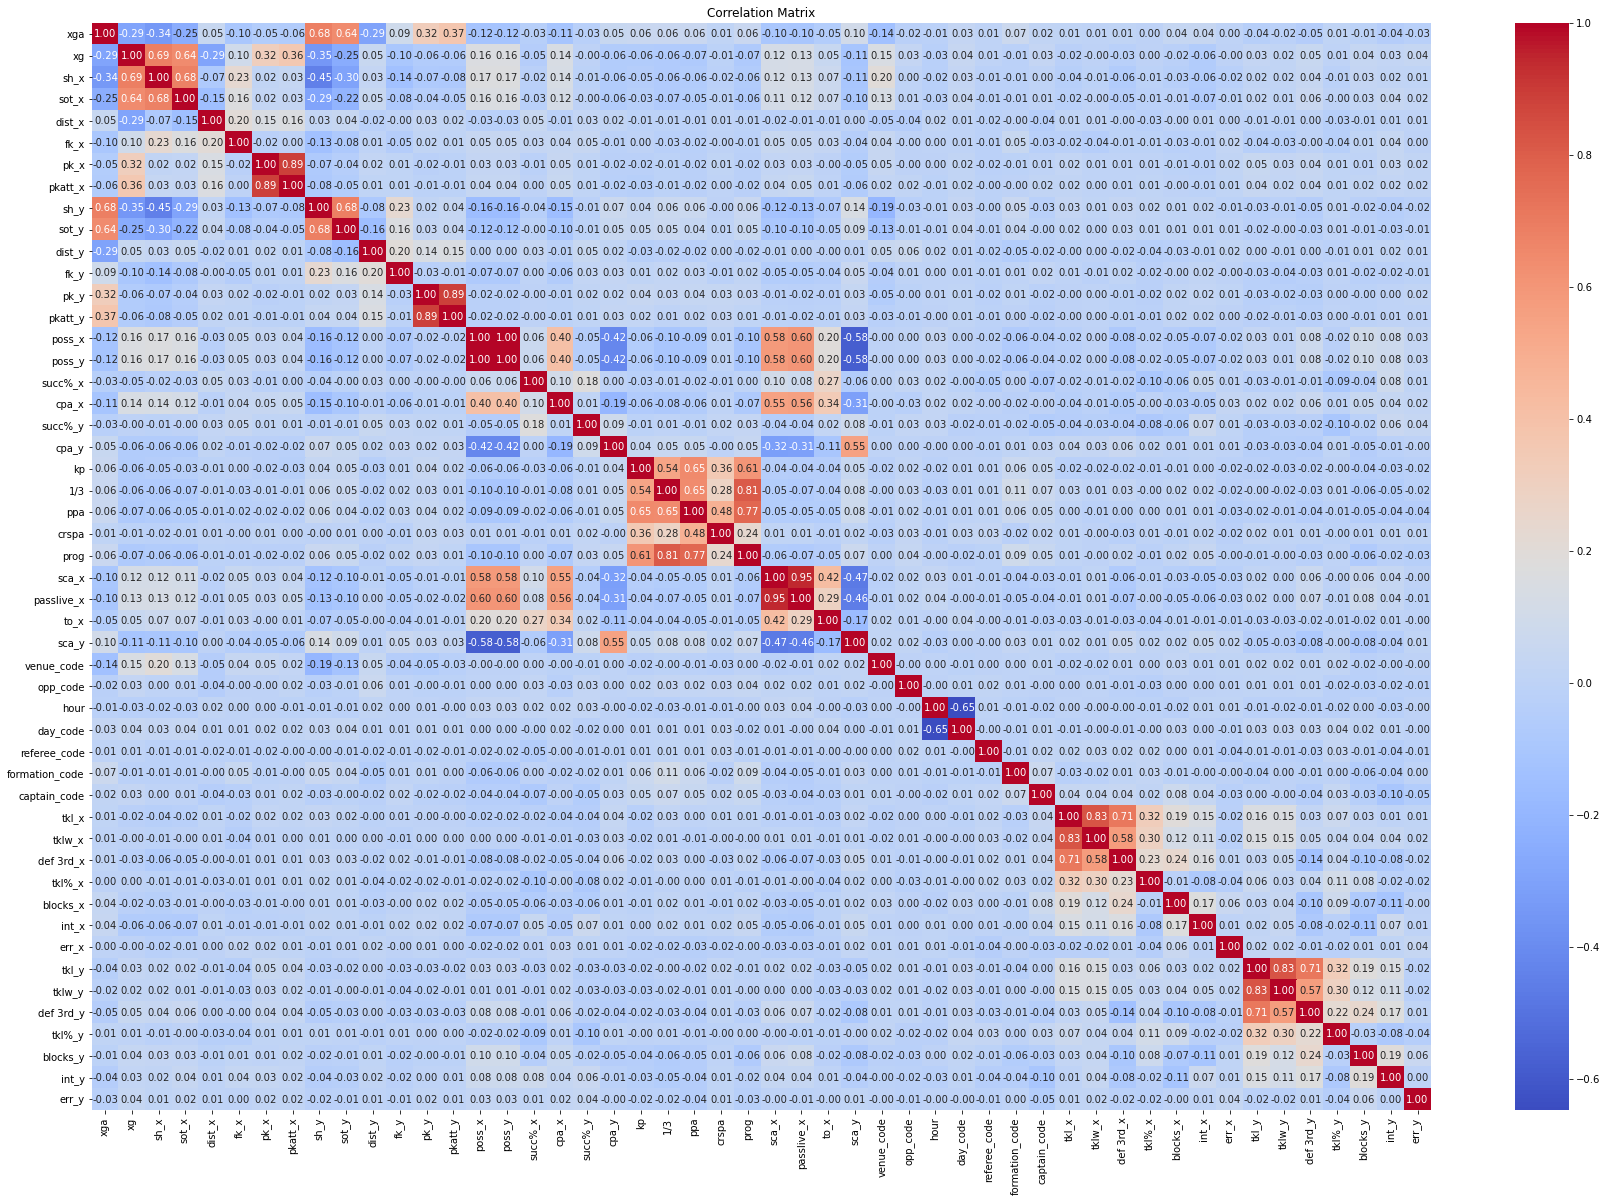

In [129]:
import pandas as pd

# Creating a correaltion matrix for the features in df
corr_matrix = epl_df[all_both].corr()

# Plotting the corr matrix to see what features are closely correlated
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [92]:
import pandas as pd


# Computing a correlation matrix for all predictors
corr_matrix = epl_df[final].corr()

# Initialising a list to store pairs with correlation scores higher than 0.7
high_corr_pairs = []

# Iterating through the correlation matrix to find pairs with correlation score > 0.7
for i, col in enumerate(corr_matrix.columns):
    for j in range(i + 1, len(corr_matrix)):
        if corr_matrix.iloc[i, j] > 0.7 and corr_matrix.iloc[i,j] < 1:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Printing the pairs with correlation scores higher than 0.7
print("Pairs with correlation score > 0.7:")
for pair in high_corr_pairs:
    print(pair)




Pairs with correlation score > 0.7:
('pk_x', 'pkatt_x', 0.8894483719721966)
('pk_y', 'pkatt_y', 0.8883317391713974)
('1/3', 'prog', 0.8127121630737864)
('ppa', 'prog', 0.7694788247258606)
('sca_x', 'passlive_x', 0.9462694894210861)
('tkl_x', 'tklw_x', 0.8275911851276871)
('tkl_x', 'def 3rd_x', 0.7119029073424259)
('tkl_y', 'tklw_y', 0.8273778156282696)
('tkl_y', 'def 3rd_y', 0.710908687192726)


In [121]:
epl_df.drop(columns = ["pkatt_x","pkatt_y","prog","tkl_x","tkl_y","sca_x"])

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,blocks_y,int_y,err_y,venue_code,opp_code,hour,day_code,referee_code,formation_code,captain_code
586,2022-08-07,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,West Ham,...,13.0,5.0,1.0,0,26,16,6,18,16,185
587,2022-08-13,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,0.0,Bournemouth,...,6.0,5.0,0.0,1,2,15,5,7,12,185
588,2022-08-21,16:30,Premier League,Matchweek 3,Sun,Away,D,3.0,3.0,Newcastle Utd,...,12.0,5.0,0.0,0,18,16,6,9,16,185
589,2022-08-27,15:00,Premier League,Matchweek 4,Sat,Home,W,4.0,2.0,Crystal Palace,...,14.0,13.0,0.0,1,8,15,5,6,12,96
590,2022-08-31,19:30,Premier League,Matchweek 5,Wed,Home,W,6.0,0.0,Nott'ham Forest,...,12.0,6.0,1.0,1,20,19,2,22,12,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,2018-09-22,15:00,Premier League,Matchweek 6,Sat,Away,D,0.0,0.0,Crystal Palace,...,14.0,11.0,1.0,0,8,15,5,0,17,72
4088,2018-09-29,15:00,Premier League,Matchweek 7,Sat,Home,L,0.0,2.0,Leicester City,...,13.0,13.0,0.0,1,13,15,5,30,17,72
4089,2018-10-06,17:30,Premier League,Matchweek 8,Sat,Away,L,2.0,3.0,Manchester Utd,...,7.0,15.0,2.0,0,17,17,5,2,17,72
4090,2018-10-20,15:00,Premier League,Matchweek 9,Sat,Home,L,0.0,1.0,Brighton,...,5.0,15.0,1.0,1,4,15,5,0,17,72


In [122]:

epl_df.to_csv("epl-game-data.csv")